In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
paths = glob.glob("./kfz_csv/*.csv")

In [3]:
dfs = []
for path in paths:
    year = int(path.replace("\\", "/").split("/")[-1].strip(".csv"))
    print(year)
    land = ""
    rb = ""
    data = []
    ofile = open(path,"r")
    header = ofile.readline()
    for line in ofile:
        if line[0].isdigit():
            data.append([year,land, rb] + line.replace("\n","").split(";"))
        elif line.startswith("RB"):
            rb = line.split(" ")[1].replace("\n","").split(";")[0]
        else:
            land = line.replace("\n","").split(";")[0]
    ofile.close()

    df = pd.DataFrame(data, columns = ["year","land", "rb"] + header.replace("\n","").split(";"))
    dfs.append(df)

2012
2013
2014
2015
2016
2017
2018
2019


In [4]:
df = pd.concat(dfs)

In [5]:
df

,year,land,rb,Stadt,Insgesamt,Benzin,Diesel,Gas (einschl. bivalent),Hybrid,Elektro,...,Euro 5,Euro 6,Sonstige2,Euro 1 2,Euro 2 2,Euro 3 2,Euro 4 2,Euro 5 2,Euro 6 2,Sonstige3
0,2012,SCHLESWIG-HOLSTEIN,,"01001 FLENSBURG,STADT",39433,26375,12601,448,,,...,5294,9,187,233,1667,3239,4692,2541,9,97
1,2012,SCHLESWIG-HOLSTEIN,,"01002 KIEL,STADT",99724,71185,27538,986,,,...,13421,30,836,679,3857,6995,9385,5991,30,427
2,2012,SCHLESWIG-HOLSTEIN,,"01003 LUEBECK,STADT",89654,65879,22799,1133,,,...,10900,30,646,551,3147,5919,7969,4727,30,307
3,2012,SCHLESWIG-HOLSTEIN,,"01004 NEUMUENSTER,STADT",37974,27051,10435,604,,,...,4441,9,165,204,1439,2791,3876,1960,9,71
4,2012,SCHLESWIG-HOLSTEIN,,01051 DITHMARSCHEN,72836,48921,23173,775,,,...,6780,21,518,539,4421,6876,8004,2912,21,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2019,THUERINGEN,ZUSAMMEN,16073 SAALFELD-RUDOLSTADT,60.204,41.610,17.795,,,,...,,,,,,,,,,
396,2019,THUERINGEN,ZUSAMMEN,16074 SAALE-HOLZLANDKREIS,49.320,33.522,14.962,,,,...,,,,,,,,,,
397,2019,THUERINGEN,ZUSAMMEN,16075 SAALE-ORLA-KREIS,50.304,33.773,15.944,,,,...,,,,,,,,,,
398,2019,THUERINGEN,ZUSAMMEN,16076 GREIZ,60.390,41.612,17.927,,,,...,,,,,,,,,,


In [6]:
df["Insgesamt"].head(5)

0    39433
1    99724
2    89654
3    37974
4    72836
Name: Insgesamt, dtype: object

In [7]:
df["land"].unique()

array(['SCHLESWIG-HOLSTEIN', 'HAMBURG', 'NIEDERSACHSEN', 'BREMEN',
       'NORDRHEIN-WESTFALEN', 'HESSEN', 'RHEINLAND-PFALZ',
       'BADEN-WUERTTEMBERG', 'BAYERN', 'SAARLAND', 'BERLIN',
       'BRANDENBURG', 'MECKLENBURG-VORPOMMERN', 'SACHSEN',
       'SACHSEN-ANHALT', 'THUERINGEN', 'BERLIN ', 'BRANDENBURG ',
       'BREMEN ', 'HAMBURG ', 'HESSEN ', 'MECKLENBURG-VORPOMMERN ',
       'NIEDERSACHSEN ', 'NORDRHEIN-WESTFALEN ', 'RHEINLAND-PFALZ ',
       'SAARLAND ', 'SACHSEN ', 'SACHSEN-ANHALT ', 'SCHLESWIG-HOLSTEIN ',
       'THUERINGEN '], dtype=object)

In [8]:
df["land"] = df["land"].str.strip(" ")

In [9]:
df[df["land"]=="SACHSEN-ANHALT"]

,year,land,rb,Stadt,Insgesamt,Benzin,Diesel,Gas (einschl. bivalent),Hybrid,Elektro,...,Euro 5,Euro 6,Sonstige2,Euro 1 2,Euro 2 2,Euro 3 2,Euro 4 2,Euro 5 2,Euro 6 2,Sonstige3
364,2012,SACHSEN-ANHALT,ZUSAMMEN,"15001 DESSAU-ROSSLAU,STADT",42134,33850,7632,700,,,...,5123,9,41887,88,699,2096,3120,1547,9,49
365,2012,SACHSEN-ANHALT,ZUSAMMEN,"15002 HALLE (SAALE),STADT",89588,71564,16641,1361,,,...,12078,28,88978,162,1290,4162,6953,3912,28,73
366,2012,SACHSEN-ANHALT,ZUSAMMEN,"15003 MAGDEBURG, STADT",103059,80614,21249,1212,,,...,14085,41,101278,220,1744,5209,8311,5507,41,148
367,2012,SACHSEN-ANHALT,ZUSAMMEN,15081 ALTMARKKREIS SALZWEDEL,50285,36980,12719,575,,,...,4425,5,49789,195,1840,3793,4907,1816,5,116
368,2012,SACHSEN-ANHALT,ZUSAMMEN,15082 ANHALT-BITTERFELD,93368,74688,17802,854,,,...,10121,10,92655,212,1761,5000,7362,3315,10,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2019,SACHSEN-ANHALT,ZUSAMMEN,15087 MANSFELD-SUEDHARZ,79.807,56.375,22.499,,,,...,,,,,,,,,,
358,2019,SACHSEN-ANHALT,ZUSAMMEN,15088 SAALEKREIS,113.461,80.909,30.686,,,,...,,,,,,,,,,
359,2019,SACHSEN-ANHALT,ZUSAMMEN,15089 SALZLANDKREIS,105.119,76.090,27.397,,,,...,,,,,,,,,,
360,2019,SACHSEN-ANHALT,ZUSAMMEN,15090 STENDAL,63.397,41.547,20.991,,,,...,,,,,,,,,,


#### Turn columns to numeric values
* remove '.' so it can be read as float

In [10]:
df.drop(axis=1, columns = header.replace("\n","").split(";")[4:], inplace=True)

In [11]:
df[["Insgesamt", "Benzin", "Diesel"]].describe()

,Insgesamt,Benzin,Diesel
count,3205,3205,3205
unique,3186,3183,3166
top,51268,31949,21501
freq,2,2,2


In [12]:
#####

for head in header.replace("\n","").split(";")[1:4]:
    df[head] = pd.to_numeric(df[head].str.replace(".", ""))
    

In [13]:
df["Insgesamt"]

0      39433
1      99724
2      89654
3      37974
4      72836
       ...  
395    60204
396    49320
397    50304
398    60390
399    51330
Name: Insgesamt, Length: 3205, dtype: int64

* split "Stadt" column into "kennzahl" and "ort" 
* by splitting each row by " " (space)
* add as new columns

In [14]:
def splits(val):
    return val[:5]
    
df["kennzahl"] = df["Stadt"].apply(splits)

In [15]:
def splits2(val):
    return val[5:].strip(" ")
    
df["ort"] = df["Stadt"].apply(splits2)

In [16]:
df["kennzahl"]

0      01001
1      01002
2      01003
3      01004
4      01051
       ...  
395    16073
396    16074
397    16075
398    16076
399    16077
Name: kennzahl, Length: 3205, dtype: object

In [17]:
df["ort"]

0          FLENSBURG,STADT
1               KIEL,STADT
2            LUEBECK,STADT
3        NEUMUENSTER,STADT
4             DITHMARSCHEN
              ...         
395    SAALFELD-RUDOLSTADT
396    SAALE-HOLZLANDKREIS
397       SAALE-ORLA-KREIS
398                  GREIZ
399       ALTENBURGER LAND
Name: ort, Length: 3205, dtype: object

In [18]:
df

,year,land,rb,Stadt,Insgesamt,Benzin,Diesel,kennzahl,ort
0,2012,SCHLESWIG-HOLSTEIN,,"01001 FLENSBURG,STADT",39433,26375,12601,01001,"FLENSBURG,STADT"
1,2012,SCHLESWIG-HOLSTEIN,,"01002 KIEL,STADT",99724,71185,27538,01002,"KIEL,STADT"
2,2012,SCHLESWIG-HOLSTEIN,,"01003 LUEBECK,STADT",89654,65879,22799,01003,"LUEBECK,STADT"
3,2012,SCHLESWIG-HOLSTEIN,,"01004 NEUMUENSTER,STADT",37974,27051,10435,01004,"NEUMUENSTER,STADT"
4,2012,SCHLESWIG-HOLSTEIN,,01051 DITHMARSCHEN,72836,48921,23173,01051,DITHMARSCHEN
...,...,...,...,...,...,...,...,...,...
395,2019,THUERINGEN,ZUSAMMEN,16073 SAALFELD-RUDOLSTADT,60204,41610,17795,16073,SAALFELD-RUDOLSTADT
396,2019,THUERINGEN,ZUSAMMEN,16074 SAALE-HOLZLANDKREIS,49320,33522,14962,16074,SAALE-HOLZLANDKREIS
397,2019,THUERINGEN,ZUSAMMEN,16075 SAALE-ORLA-KREIS,50304,33773,15944,16075,SAALE-ORLA-KREIS
398,2019,THUERINGEN,ZUSAMMEN,16076 GREIZ,60390,41612,17927,16076,GREIZ


In [19]:
df["ort"]

0          FLENSBURG,STADT
1               KIEL,STADT
2            LUEBECK,STADT
3        NEUMUENSTER,STADT
4             DITHMARSCHEN
              ...         
395    SAALFELD-RUDOLSTADT
396    SAALE-HOLZLANDKREIS
397       SAALE-ORLA-KREIS
398                  GREIZ
399       ALTENBURGER LAND
Name: ort, Length: 3205, dtype: object

#### Load sticktoff dataset

In [20]:
stickstoff = pd.read_pickle("stickstoff_daten.pkl")

In [21]:
stickstoff

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert,umgebungstyp_grob
0,BRANDENBURG,2002,'DEBB001',BURG (SPREEWALD),vorstädtisches Gebiet,Hintergrund,10.0,69,vorstädtisch
1,BRANDENBURG,2002,'DEBB006',COTTBUS-SÜD,städtisches Gebiet,Hintergrund,19.0,107,städtisch
2,BRANDENBURG,2002,'DEBB009',FORST,vorstädtisches Gebiet,Hintergrund,16.0,83,vorstädtisch
3,BRANDENBURG,2002,'DEBB021',POTSDAM-ZENTRUM,städtisches Gebiet,Hintergrund,21.0,111,städtisch
4,BRANDENBURG,2002,'DEBB024',SENFTENBERG,städtisches Gebiet,Hintergrund,19.0,113,städtisch
...,...,...,...,...,...,...,...,...,...
8681,UMWELTBUNDESAMT,2019,DEUB004,SCHAUINSLAND,ländlich regional,Hintergrund,2.0,0,ländlich
8682,UMWELTBUNDESAMT,2019,DEUB029,SCHMÜCKE,ländlich Gebiet,Hintergrund,3.0,0,ländlich
8683,UMWELTBUNDESAMT,2019,DEUB005,WALDHOF,ländlich Gebiet,Hintergrund,7.0,0,ländlich
8684,UMWELTBUNDESAMT,2019,DEUB001,WESTERLAND,ländlich Gebiet,Hintergrund,5.0,0,ländlich


* get only first "word" from sticksplit.name and kraftsplit.ort 
* for potential merging
* try to split by ' ', '-', '/', ','

In [22]:
sticksplit = stickstoff["name"].str.split(" ").str[0].str.split("-").str[0].str.split("/").str[0].str.split(",").str[0]

In [23]:
kraftsplit = df["ort"].str.split(" ").str[0].str.split("-").str[0].str.split("/").str[0].str.split(",").str[0]

* try to match the new series objects sticksplit and kraftsplit
* count matches and non matches

In [24]:
match = 0
no_match = 0
count = 0

isin = False
for index, row in sticksplit.iteritems():
    isin = False
    for index2, row2 in kraftsplit.iteritems():
        if row == row2:
            isin = True
            #print(row, row2)
    if isin:
        match+=1
        count += 1
    else:
        no_match +=1

In [25]:
match

4344

In [26]:
no_match

4341

In [27]:
sticksplit

0               BURG
1            COTTBUS
2              FORST
3            POTSDAM
4        SENFTENBERG
            ...     
8681    SCHAUINSLAND
8682        SCHMÜCKE
8683         WALDHOF
8684      WESTERLAND
8685          ZINGST
Name: name, Length: 8685, dtype: object

In [28]:
kraftsplit

0         FLENSBURG
1              KIEL
2           LUEBECK
3       NEUMUENSTER
4      DITHMARSCHEN
           ...     
395        SAALFELD
396           SAALE
397           SAALE
398           GREIZ
399     ALTENBURGER
Name: ort, Length: 3205, dtype: object

# Insert proper year variable (im moment nur ein Jahr/File)

In [29]:
df

,year,land,rb,Stadt,Insgesamt,Benzin,Diesel,kennzahl,ort
0,2012,SCHLESWIG-HOLSTEIN,,"01001 FLENSBURG,STADT",39433,26375,12601,01001,"FLENSBURG,STADT"
1,2012,SCHLESWIG-HOLSTEIN,,"01002 KIEL,STADT",99724,71185,27538,01002,"KIEL,STADT"
2,2012,SCHLESWIG-HOLSTEIN,,"01003 LUEBECK,STADT",89654,65879,22799,01003,"LUEBECK,STADT"
3,2012,SCHLESWIG-HOLSTEIN,,"01004 NEUMUENSTER,STADT",37974,27051,10435,01004,"NEUMUENSTER,STADT"
4,2012,SCHLESWIG-HOLSTEIN,,01051 DITHMARSCHEN,72836,48921,23173,01051,DITHMARSCHEN
...,...,...,...,...,...,...,...,...,...
395,2019,THUERINGEN,ZUSAMMEN,16073 SAALFELD-RUDOLSTADT,60204,41610,17795,16073,SAALFELD-RUDOLSTADT
396,2019,THUERINGEN,ZUSAMMEN,16074 SAALE-HOLZLANDKREIS,49320,33522,14962,16074,SAALE-HOLZLANDKREIS
397,2019,THUERINGEN,ZUSAMMEN,16075 SAALE-ORLA-KREIS,50304,33773,15944,16075,SAALE-ORLA-KREIS
398,2019,THUERINGEN,ZUSAMMEN,16076 GREIZ,60390,41612,17927,16076,GREIZ


In [30]:
stickstoff

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert,umgebungstyp_grob
0,BRANDENBURG,2002,'DEBB001',BURG (SPREEWALD),vorstädtisches Gebiet,Hintergrund,10.0,69,vorstädtisch
1,BRANDENBURG,2002,'DEBB006',COTTBUS-SÜD,städtisches Gebiet,Hintergrund,19.0,107,städtisch
2,BRANDENBURG,2002,'DEBB009',FORST,vorstädtisches Gebiet,Hintergrund,16.0,83,vorstädtisch
3,BRANDENBURG,2002,'DEBB021',POTSDAM-ZENTRUM,städtisches Gebiet,Hintergrund,21.0,111,städtisch
4,BRANDENBURG,2002,'DEBB024',SENFTENBERG,städtisches Gebiet,Hintergrund,19.0,113,städtisch
...,...,...,...,...,...,...,...,...,...
8681,UMWELTBUNDESAMT,2019,DEUB004,SCHAUINSLAND,ländlich regional,Hintergrund,2.0,0,ländlich
8682,UMWELTBUNDESAMT,2019,DEUB029,SCHMÜCKE,ländlich Gebiet,Hintergrund,3.0,0,ländlich
8683,UMWELTBUNDESAMT,2019,DEUB005,WALDHOF,ländlich Gebiet,Hintergrund,7.0,0,ländlich
8684,UMWELTBUNDESAMT,2019,DEUB001,WESTERLAND,ländlich Gebiet,Hintergrund,5.0,0,ländlich


In [31]:
stickstoff["split"] = sticksplit
df["split"] = kraftsplit

In [32]:
df.rename(columns={"land":"bundesland", "year":"jahr"}, inplace=True)
stickstoff["jahr"] = pd.to_numeric(stickstoff["jahr"])

In [33]:
result = pd.merge(left=stickstoff, right=df, on=["jahr", "bundesland", "split"])

In [34]:
result.shape

(2523, 17)

In [35]:
result

,bundesland,jahr,station,name,umgebungstyp,emissionstyp,jahresmittel,maxstundenwert,umgebungstyp_grob,split,rb,Stadt,Insgesamt,Benzin,Diesel,kennzahl,ort
0,BADEN-WUERTTEMBERG,2012,DEBW076,BADEN-BADEN,vorstädtisches Gebiet,Hintergrund,15.0,0,vorstädtisch,BADEN,KARLSRUHE,"08211 BADEN-BADEN,STADT",31179,21411,9555,08211,"BADEN-BADEN,STADT"
1,BADEN-WUERTTEMBERG,2012,DEBW046,BIBERACH,vorstädtisches Gebiet,Hintergrund,19.0,0,vorstädtisch,BIBERACH,TUEBINGEN,08426 BIBERACH,110593,72949,36744,08426,BIBERACH
2,BADEN-WUERTTEMBERG,2012,DEBW084,FREIBURG,städtisches Gebiet,Hintergrund,19.0,0,städtisch,FREIBURG,FREIBURG,08311 FREIBURG I.BREISG.STADT,85591,56824,27764,08311,FREIBURG I.BREISG.STADT
3,BADEN-WUERTTEMBERG,2012,DEBW122,FREIBURG SCHWARZWALDSTRASSE (V),städtisches Gebiet,Verkehr,65.0,0,städtisch,FREIBURG,FREIBURG,08311 FREIBURG I.BREISG.STADT,85591,56824,27764,08311,FREIBURG I.BREISG.STADT
4,BADEN-WUERTTEMBERG,2012,DEBW127,FREIBURG ZÄHRINGER STRASSE (S),städtisches Gebiet,Verkehr,50.0,---,städtisch,FREIBURG,FREIBURG,08311 FREIBURG I.BREISG.STADT,85591,56824,27764,08311,FREIBURG I.BREISG.STADT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,THUERINGEN,2019,DETH102,SUHL DR.TH.-NEUBAUER-STR.,städtisches Gebiet,Verkehr,29.0,--- 1),städtisch,SUHL,ZUSAMMEN,"16054 SUHL, STADT",20424,13866,6174,16054,"SUHL, STADT"
2519,THUERINGEN,2019,DETH072,SUHL F.-KÖNIG-STR,städtisches Gebiet,Verkehr,22.0,0,städtisch,SUHL,ZUSAMMEN,"16054 SUHL, STADT",20424,13866,6174,16054,"SUHL, STADT"
2520,THUERINGEN,2019,DETH101,WEIMAR JENAER STR.,städtisches Gebiet,Verkehr,28.0,--- 1),städtisch,WEIMAR,ZUSAMMEN,"16055 WEIMAR, STADT",29074,19887,8662,16055,"WEIMAR, STADT"
2521,THUERINGEN,2019,DETH093,WEIMAR SCHWANSEESTR.,städtisches Gebiet,Hintergrund,15.0,0,städtisch,WEIMAR,ZUSAMMEN,"16055 WEIMAR, STADT",29074,19887,8662,16055,"WEIMAR, STADT"


In [36]:
for id, item in df["Stadt"].iteritems():
    if "BERLIN" in item:
        print(item)

11000  BERLIN
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 
11000 BERLIN 


In [37]:
for id, item in df["split"].iteritems():
    if "BERLIN" in item:
        print(item)

BERLIN
BERLIN
BERLIN
BERLIN
BERLIN
BERLIN
BERLIN
BERLIN


In [38]:
result.groupby("umgebungstyp")["umgebungstyp"].count()

umgebungstyp
ländlich Gebiet            13
ländlich regional          48
ländlich stadtnah          39
städtisches Gebiet       2131
vorstädtisches Gebiet     292
Name: umgebungstyp, dtype: int64

In [39]:
result.groupby("emissionstyp")["emissionstyp"].count()

emissionstyp
Hintergrund    1025
Industrie       111
Verkehr        1387
Name: emissionstyp, dtype: int64

In [40]:
selection = result[result["emissionstyp"] == "Verkehr"]
result_clean = selection[["jahr","bundesland","split","jahresmittel","Insgesamt"]]
result_clean["dieselanteil"] = selection["Diesel"] / selection["Insgesamt"]

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [41]:
result_clean

,jahr,bundesland,split,jahresmittel,Insgesamt,dieselanteil
3,2012,BADEN-WUERTTEMBERG,FREIBURG,65.0,85591,0.324380
4,2012,BADEN-WUERTTEMBERG,FREIBURG,50.0,85591,0.324380
6,2012,BADEN-WUERTTEMBERG,HEIDELBERG,51.0,55499,0.300348
7,2012,BADEN-WUERTTEMBERG,HEIDENHEIM,53.0,73503,0.299321
10,2012,BADEN-WUERTTEMBERG,KARLSRUHE,46.0,131995,0.312035
...,...,...,...,...,...,...
2517,2019,THUERINGEN,SAALFELD,28.0,60204,0.295578
2518,2019,THUERINGEN,SUHL,29.0,20424,0.302291
2519,2019,THUERINGEN,SUHL,22.0,20424,0.302291
2520,2019,THUERINGEN,WEIMAR,28.0,29074,0.297929


In [42]:
sum_no2 = result_clean.groupby("split")["jahresmittel","Insgesamt", "dieselanteil"].mean()

C:\Users\Robin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


In [43]:
sum_no2

,jahresmittel,Insgesamt,dieselanteil
split,,,
AACHEN,44.700000,2.780634e+05,0.316956
ANSBACH,32.750000,6.929712e+04,0.347021
AUGSBURG,36.533333,1.404473e+05,0.309928
BAYREUTH,30.000000,5.242631e+04,0.325690
BERLIN,43.892857,1.206810e+06,0.251268
...,...,...,...
WITTENBERG,30.250000,7.452338e+04,0.231271
WOLFSBURG,34.111111,1.367520e+05,0.405574
WORMS,28.250000,4.306225e+04,0.276980


In [57]:
sum_no2.to_csv("sum_no2.csv")

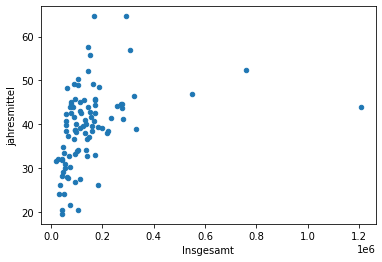

In [44]:
sum_no2.plot(x="Insgesamt", y="jahresmittel",kind="scatter") #xlim=(0,350000)

In [45]:
sum_no2.corr()

,jahresmittel,Insgesamt,dieselanteil
jahresmittel,1.000000,0.362066,0.147191
Insgesamt,0.362066,1.000000,-0.015560
dieselanteil,0.147191,-0.015560,1.000000


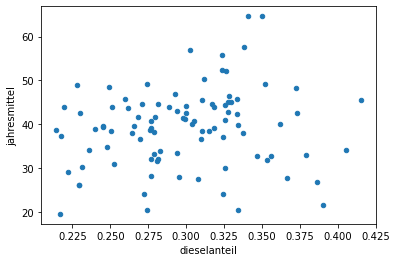

In [46]:
sum_no2.plot(x="dieselanteil", y="jahresmittel",kind="scatter")

In [47]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = sum_no2["Insgesamt"].values.reshape(-1, 1)
train_y = sum_no2["jahresmittel"].values.reshape(-1, 1)
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[2.12594639e-05]]
Intercept:  [36.10769247]


In [48]:
Y_pred = regr.predict(train_x) 

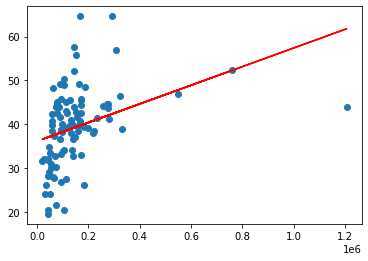

In [49]:
plt.scatter(train_x, train_y)
plt.plot(train_x, Y_pred, color='red')
plt.show()

In [50]:
from sklearn.metrics import r2_score

#train_x = np.asanyarray(test[['ENGINESIZE']])
#train_y = np.asanyarray(test[['CO2EMISSIONS']])
train_y_ = regr.predict(train_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y_ - train_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y_ - train_y) ** 2))
print("R2-score: %.2f" % r2_score(train_y, train_y_) )

Mean absolute error: 6.30
Residual sum of squares (MSE): 69.28
R2-score: 0.13


In [51]:
regr = linear_model.LinearRegression()
train_x = sum_no2["dieselanteil"].values.reshape(-1, 1)
train_y = sum_no2["jahresmittel"].values.reshape(-1, 1)
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[28.78412753]]
Intercept:  [30.66673018]


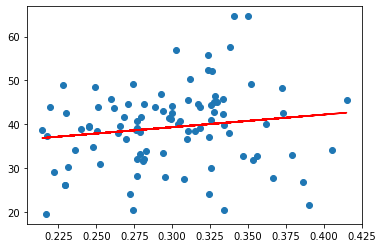

In [52]:
Y_pred = regr.predict(train_x) 
plt.scatter(train_x, train_y)
plt.plot(train_x, Y_pred, color='red')
plt.show()

In [53]:
sum_no2[sum_no2["Insgesamt"] > 400000]

,jahresmittel,Insgesamt,dieselanteil
split,,,
BERLIN,43.892857,1.206810e+06,0.251268
HAMBURG,52.375000,7.592280e+05,0.323915
HANNOVER,46.772727,5.510505e+05,0.292307


In [54]:
result[result["split"] == "HANNOVER"]["Insgesamt"]

145     526268
146     526268
147     526268
148     526268
149     526268
150     526268
151     526268
450     533826
451     533826
452     533826
453     533826
454     533826
455     533826
456     533826
759     540228
760     540228
761     540228
762     540228
763     540228
764     540228
765     540228
1060    547499
1061    547499
1062    547499
1063    547499
1064    547499
1065    547499
1066    547499
1366    556153
1367    556153
1368    556153
1369    556153
1370    556153
1371    556153
1677    564676
1678    564676
1679    564676
1680    564676
1681    564676
1682    564676
2024    572392
2025    572392
2026    572392
2027    572392
2028    572392
2029    572392
2373    578638
2374    578638
2375    578638
2376    578638
2377    578638
2378    578638
Name: Insgesamt, dtype: int64

In [55]:
#sum_no2 = sum_no2[sum_no2["Insgesamt"] < 400000]

In [56]:
from sklearn.metrics import r2_score

#train_x = np.asanyarray(test[['ENGINESIZE']])
#train_y = np.asanyarray(test[['CO2EMISSIONS']])
train_y_ = regr.predict(train_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y_ - train_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y_ - train_y) ** 2))
print("R2-score: %.2f" % r2_score(train_y, train_y_) )

Mean absolute error: 6.80
Residual sum of squares (MSE): 78.00
R2-score: 0.02
